# Impacts of Landuse on Water Flow Peaks
by Martha Burket, Carson DeSotel  
GEOG 5543  
Fall 2021

In [8]:
'''
    Installation:
'''
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
'''
    Imports:
'''
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

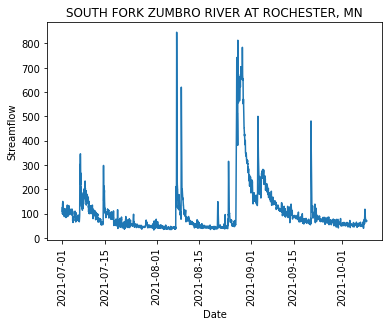

In [2]:
from climata.usgs import InstantValueIO

station_id = '05372995'
param_id   = '00060'


data = InstantValueIO(
    start_date = '2021-07-01',
    end_date   = '2021-10-08',
    station    = station_id,
    parameter  = param_id,
)

for series in data:
    flow   = [r[1] for r in series.data]
    dates = [r[0] for r in series.data]
    
plt.plot(dates, flow)
plt.xlabel('Date')
plt.ylabel('Streamflow')
plt.title(series.site_name)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
'''
    Fetch example data from Minehaha Creek Collection Site
'''
USGS_IV_URL = 'http://waterservices.usgs.gov/nwis/iv/'

minehaha_site_code = '05289800'

payload = {'site'    : minehaha_site_code, 
           'format'  : 'json', 
           'startDT' : '2021-10-01', # start & end date must be in ISO-8601 Format (yyyy-mm-dd)
           'endDT'   : '2021-10-08',
          }

response = requests.get(USGS_IV_URL, params = payload)

data = response.json()

### References
[1] https://www.earthdatascience.org/tutorials/acquire-and-visualize-usgs-hydrology-data/  
[2] https://waterservices.usgs.gov/rest/IV-Service.html  
[3] https://www.ogc.org/standards/waterml  
[4] https://docs.python-requests.org/en/latest/user/quickstart/  
[5] https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured?qt-science_center_objects=0#qt-science_center_objects  
